In [412]:
!pip3 install wordcloud

In [666]:
import ast
import statistics as stat

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Import data and convert columns to correct format
- Record the number of simulations with failures
- Record the average number of components in cascades failures
- How much time elapses until the first failure?
- How much time elapses between cascaded failures?

In [667]:
# Import simulation results
results = pd.read_csv('results_summary.csv', keep_default_na=False)

# Remove empty rows
results = results.iloc[::2] 

results.head(n = 3)

,Simulation no#,Line,Load,Wind1,Wind2,Wind3,flag,Sequence
0,1,Line 04 - 05,0.7,0,0,0,0,[]
2,2,Line 06 - 07,0.7,0,0,0,0,[]
4,3,Line 06 - 11,0.7,0,0,0,0,[]


In [668]:
# Convert columns to correct format
results['Simulation no#'] = results['Simulation no#'].astype(str)
results['Load'] = results['Load'].astype(float)
results['Wind1'] = results['Wind1'].astype(float)
results['Wind2'] = results['Wind2'].astype(float)
results['Wind3'] = results['Wind3'].astype(float)
results['flag'] = results['flag'].astype(int)
#results['Sequence'] = results['Sequence'].astype(str)

results.head(n = 3)

,Simulation no#,Line,Load,Wind1,Wind2,Wind3,flag,Sequence
0,1,Line 04 - 05,0.7,0.0,0.0,0.0,0,[]
2,2,Line 06 - 07,0.7,0.0,0.0,0.0,0,[]
4,3,Line 06 - 11,0.7,0.0,0.0,0.0,0,[]


### Notes
- Simulations with no failures are labeled with flag = 0
- Cascading failures appear to have been labelled with flag = 1
- Simulation errors are labeled with  flag = 3 and Sequence = Error

In [675]:
print('Unique flags: {}'.format(results['flag'].unique().tolist()))
print('Flag counts: {}'.format(results['flag'].value_counts().tolist()))

Unique flags: [0, 1, 3]
Flag counts: [35934, 7131, 999]


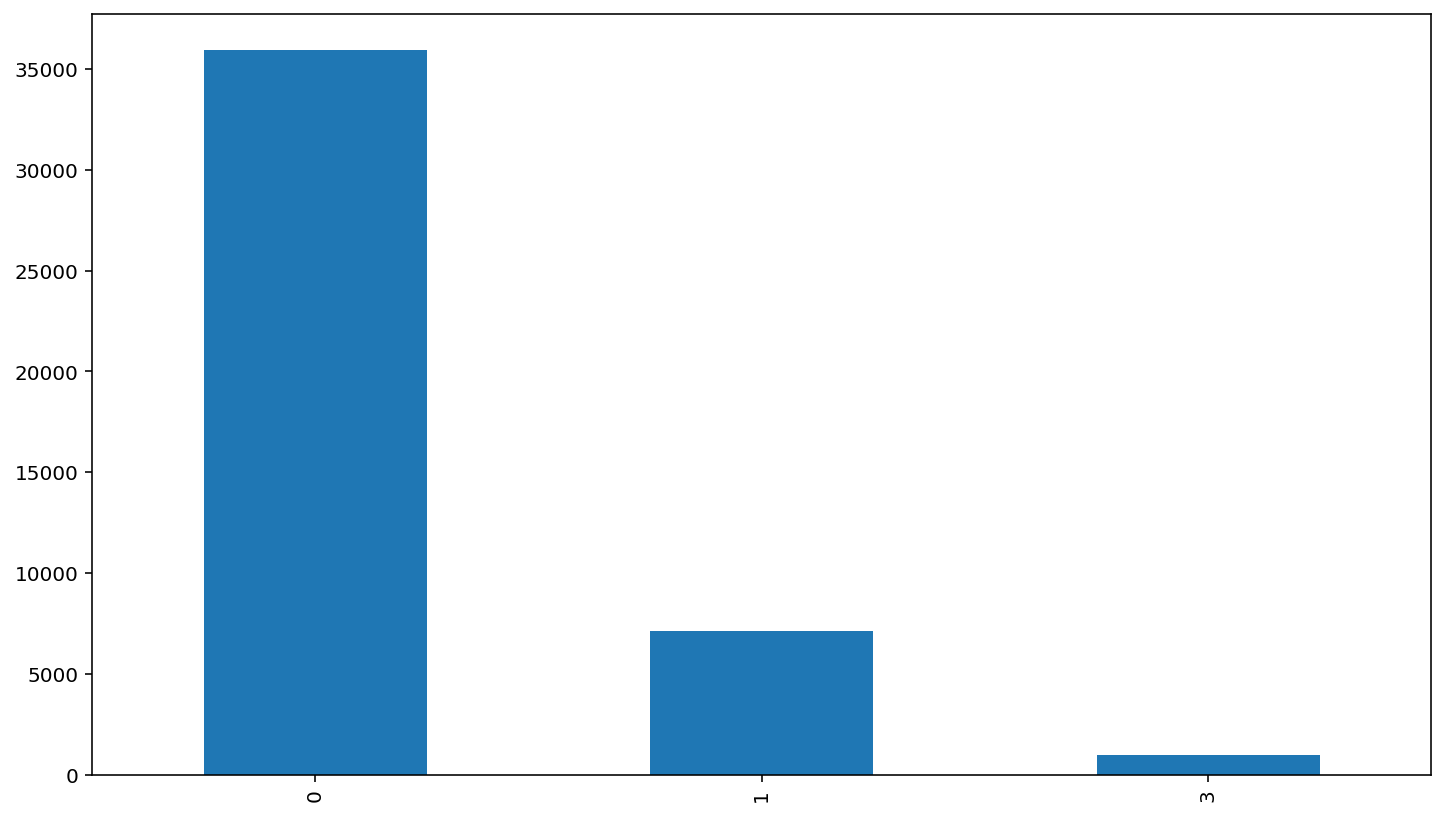

In [676]:
results['flag'].value_counts().plot(kind='bar')

In [677]:
results[results['flag'].astype(float) == 3].iloc[:5, :]

,Simulation no#,Line,Load,Wind1,Wind2,Wind3,flag,Sequence
136,69,Line 04 - 05,0.7,0.0,0.0,0.4,3,Error
544,273,Line 04 - 05,0.7,0.0,0.2,0.4,3,Error
578,290,Line 07 - 08,0.7,0.0,0.2,0.4,3,Error
986,494,Line 07 - 08,0.7,0.0,0.4,0.4,3,Error
1190,596,Line 07 - 08,0.7,0.0,0.4,1.0,3,Error


### Failure Statistics
- Number of failed components
- Time elapsed until the first failure
- Time elapsed between cascaded failures

In [678]:
# Extracting the cascading failures
seq = [i for i in results['Sequence'].tolist() if i != '[]' and i != 'Error']
cascades = [ast.literal_eval(x) for x in seq]

# Print statistics
print('Ave. number of failed components: {:.3f}'.format(stat.mean(n_fail_comp)))
print('Std. dev. of the number of failed components: {:.3f}'.format(stat.stdev(n_fail_comp)))

Ave. number of failed components: 9.701
Std. dev. of the number of failed components: 13.708


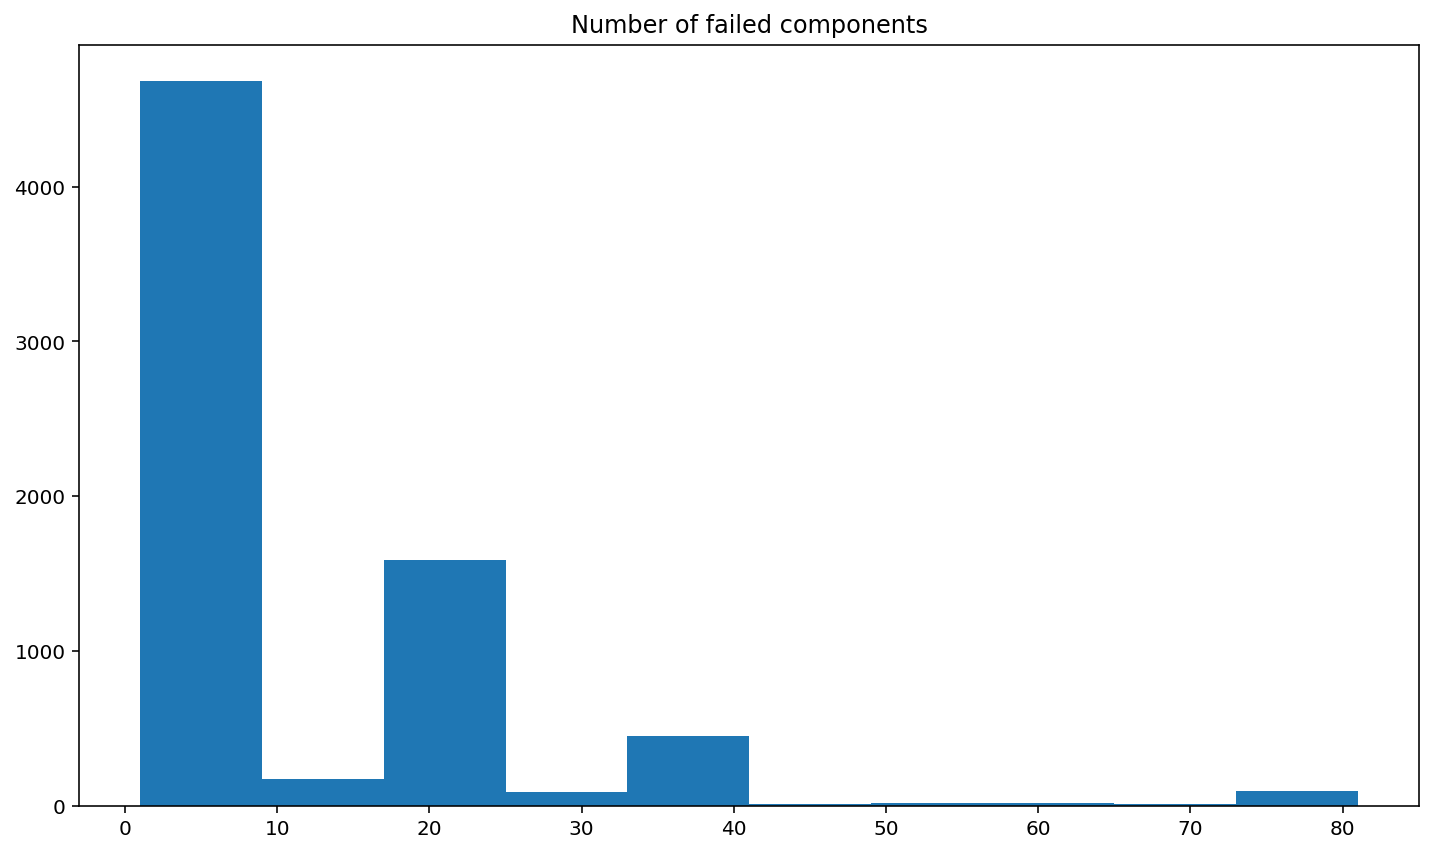

In [679]:
# Plot the histogram of the number of failed components
n_fail_comp = [len(x) for x in cascades]
plt.hist(n_fail_comp)
plt.title('Number of failed components')
plt.show()

In [680]:
first_fail = [float(x[0][2]) if len(x[0])==3 else float(x[0][1]) for x in cascades]

# Print statistics
print('Ave. time elapsed until first failure: {:.3f}'.format(stat.mean(first_fail)))
print('Std. dev. of time elapsed until first failure: {:.3f}'.format(stat.stdev(first_fail)))

Ave. time elapsed until first failure: 2.402
Std. dev. of time elapsed until first failure: 2.650


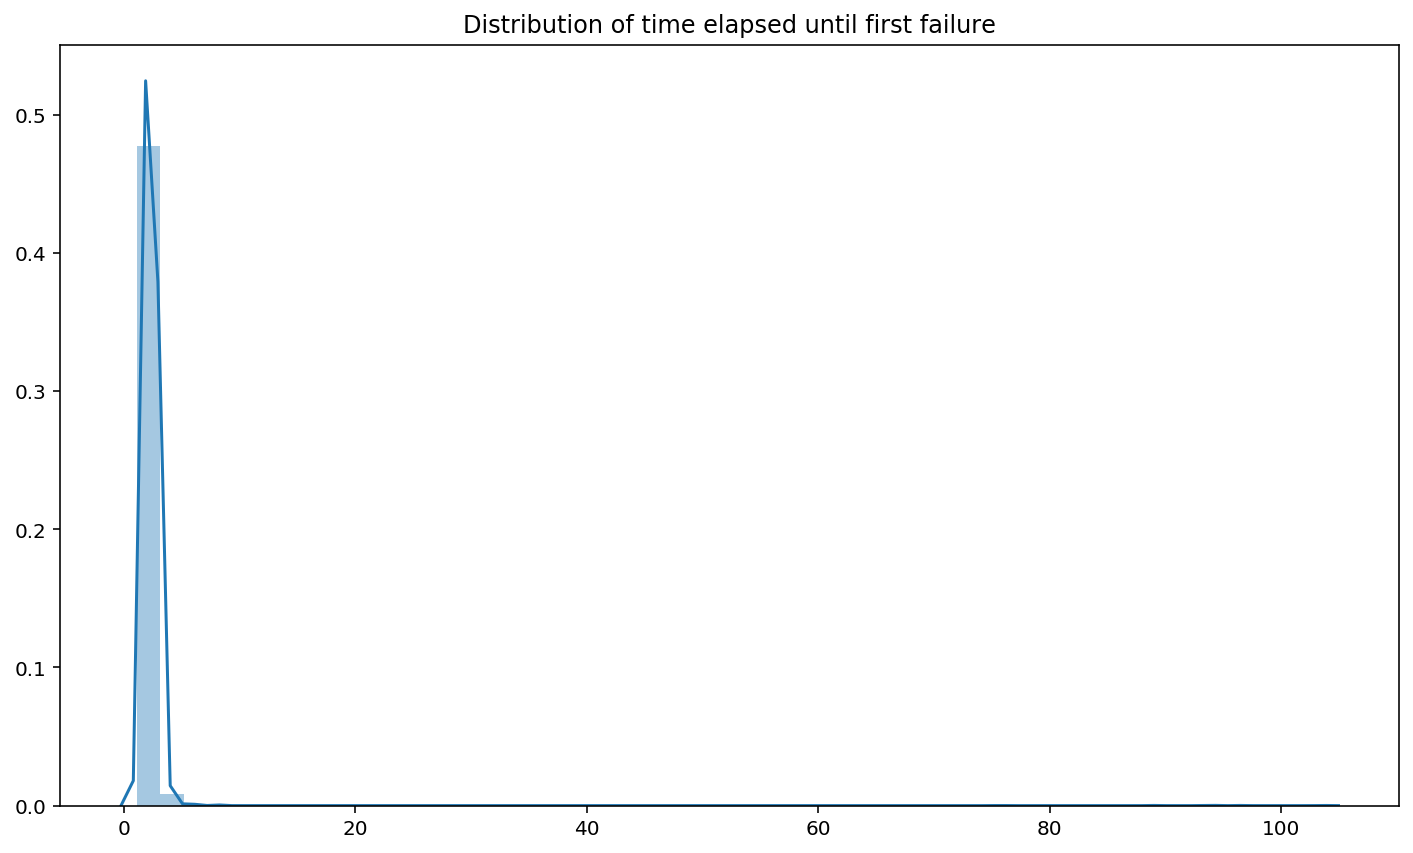

In [681]:
# Plot the distribution of time elapsed until first failure
ax = sns.distplot(first_fail).set_title('Distribution of time elapsed until first failure')

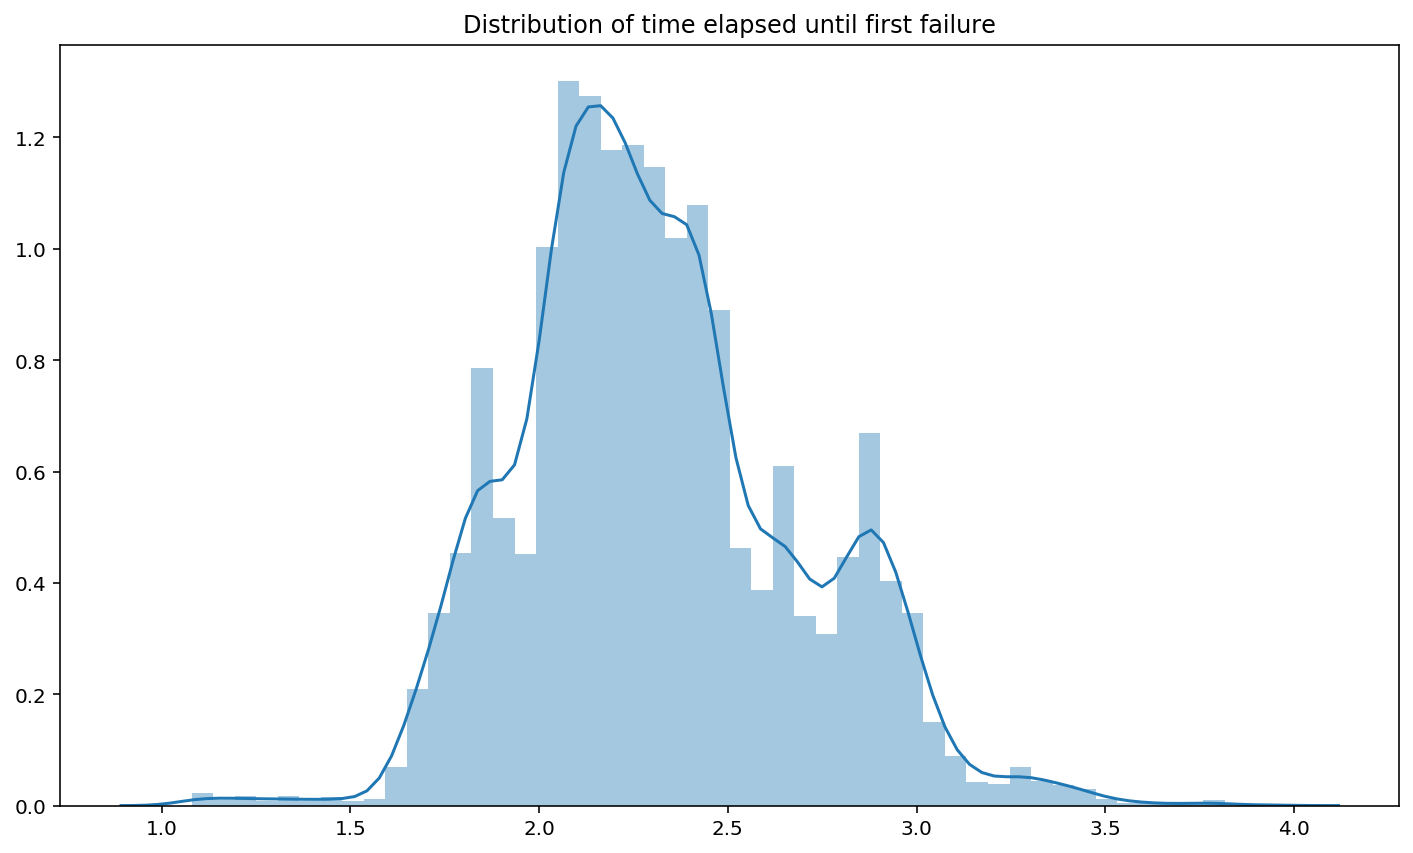

In [282]:
# Plot the distribution of time elapsed until first failure, only use the cases where the first failure happens within 4 seconds
ax = sns.distplot([x for x in first_fail if x < 4]).set_title('Distribution of time elapsed until first failure')

In [683]:
# Time between cascaded fails
time_btw_fails = []

for elem in cascades:
    t_fail = [float(x[2]) if len(x)==3 else float(x[1]) for x in elem]
    
    if len(t_fail) > 1:
        # Take the difference between recorded times
        t_fail = [j-i for i, j in zip(t_fail[:-1], t_fail[1:])]
        time_btw_fails.extend(t_fail)


print('Ave. time elapsed between failures: {:.3f}'.format(stat.mean(time_btw_fails)))
print('Std. dev. of time elapsed between_failures: {:.3f}'.format(stat.stdev(time_btw_fails)))

Ave. time elapsed between failures: 2.120
Std. dev. of time elapsed between_failures: 10.451


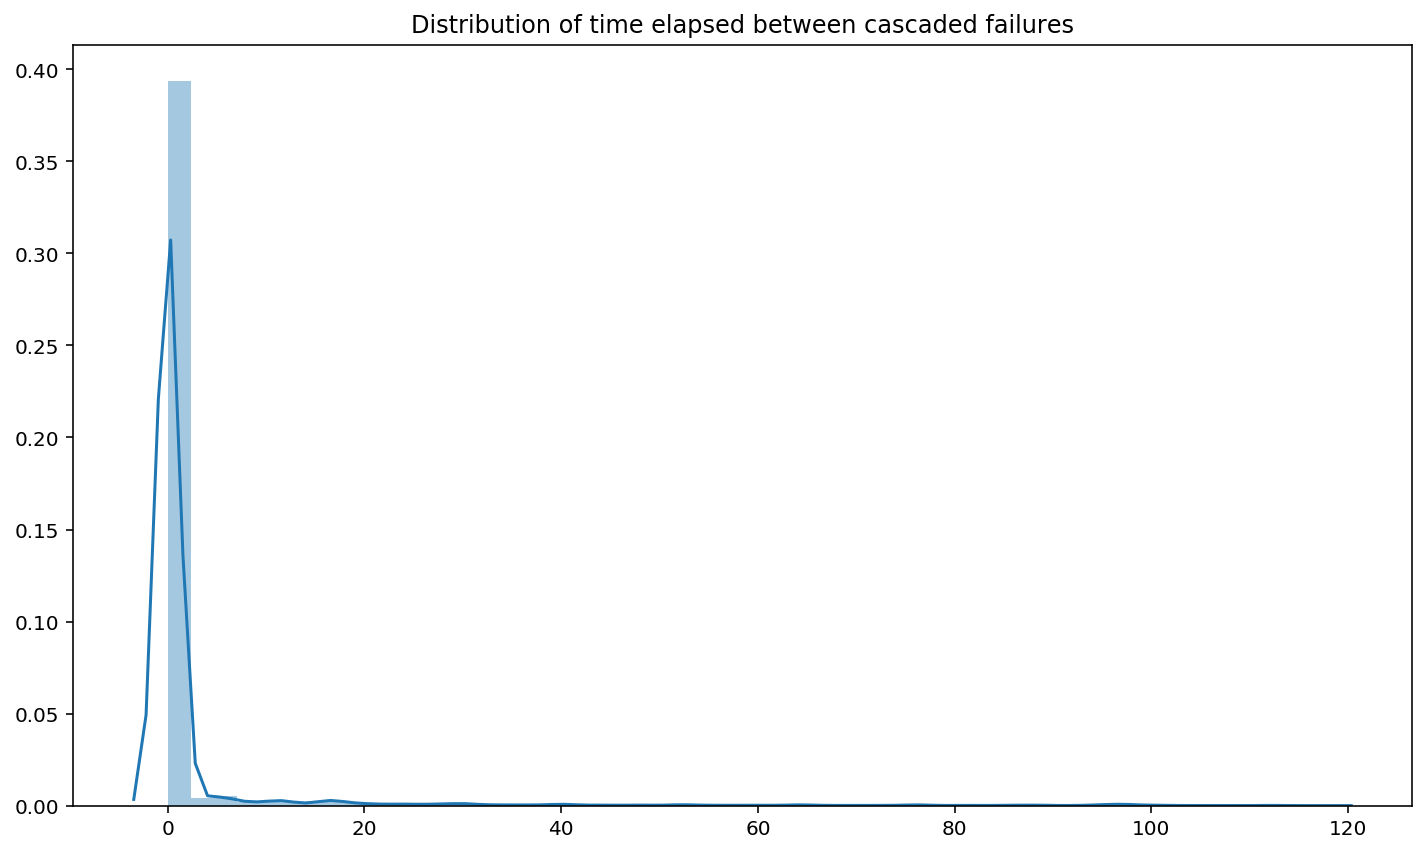

In [305]:
ax = sns.distplot(time_btw_fails).set_title('Distribution of time elapsed between cascaded failures')

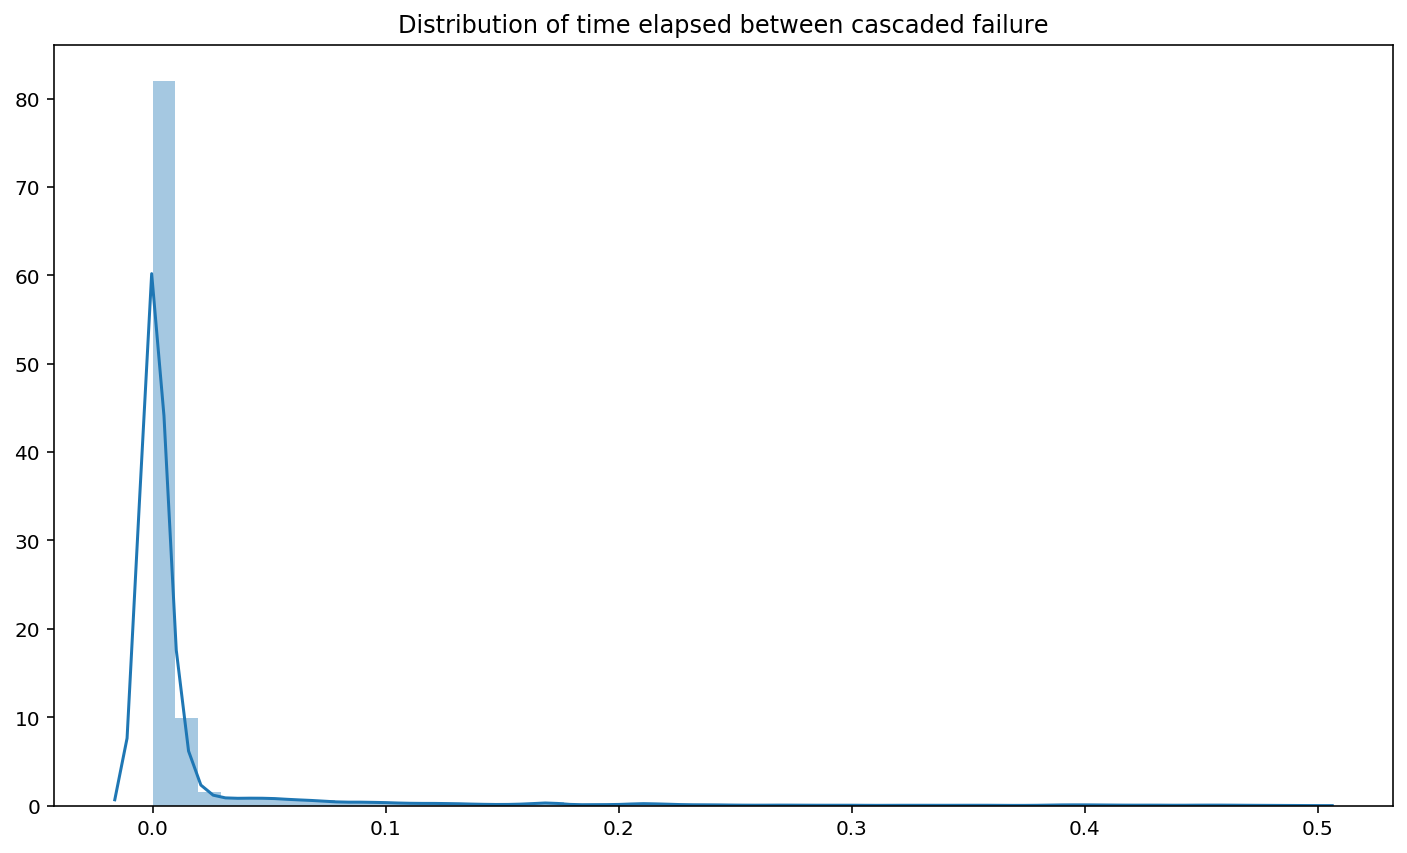

In [286]:
# Plot the distribution of time elapsed between cascaded failures, only use the cases where there isn't more than 0.5 seconds between failures
ax = sns.distplot([x for x in time_btw_fails if x < 0.5]).set_title('Distribution of time elapsed between cascaded failure')

In [688]:
# Time between first and second fails
time_btw_1st_2nd = []

for elem in cascades:
    t_fail = [float(x[2]) if len(x)==3 else float(x[1]) for x in elem]
    
    if len(t_fail) > 1:
        # Take the difference between recorded times
        t_fail = [j-i for i, j in zip(t_fail[:-1], t_fail[1:])]
        time_btw_1st_2nd.append(t_fail[0])


print('Ave. time elapsed between failures: {:.3f}'.format(stat.mean(time_btw_1st_2nd)))
print('Std. dev. of time elapsed between_failures: {:.3f}'.format(stat.stdev(time_btw_1st_2nd)))

Ave. time elapsed between failures: 7.813
Std. dev. of time elapsed between_failures: 16.422


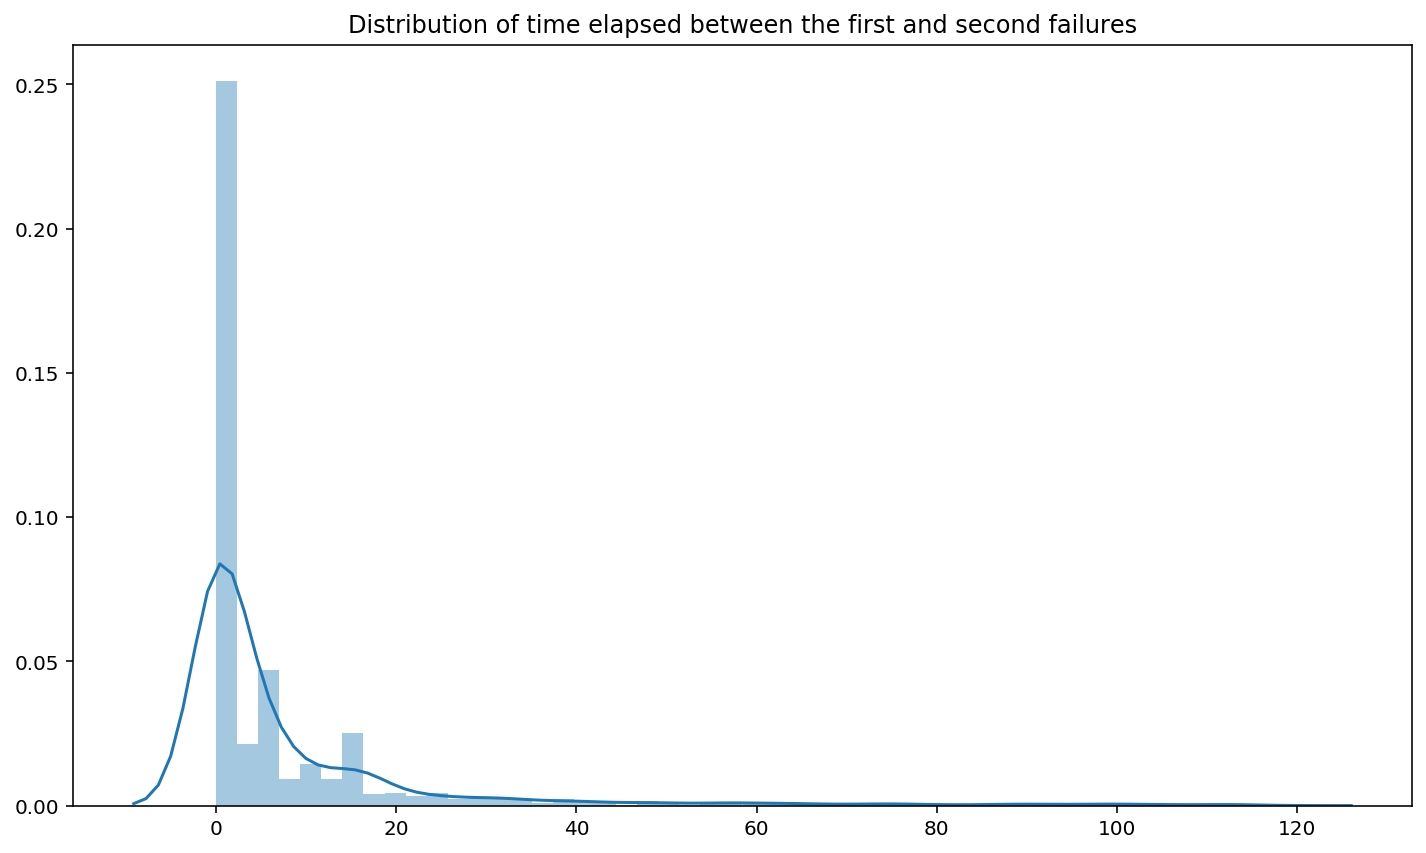

In [695]:
ax = sns.distplot(time_btw_1st_2nd).set_title('Distribution of time elapsed between the first and second failures')

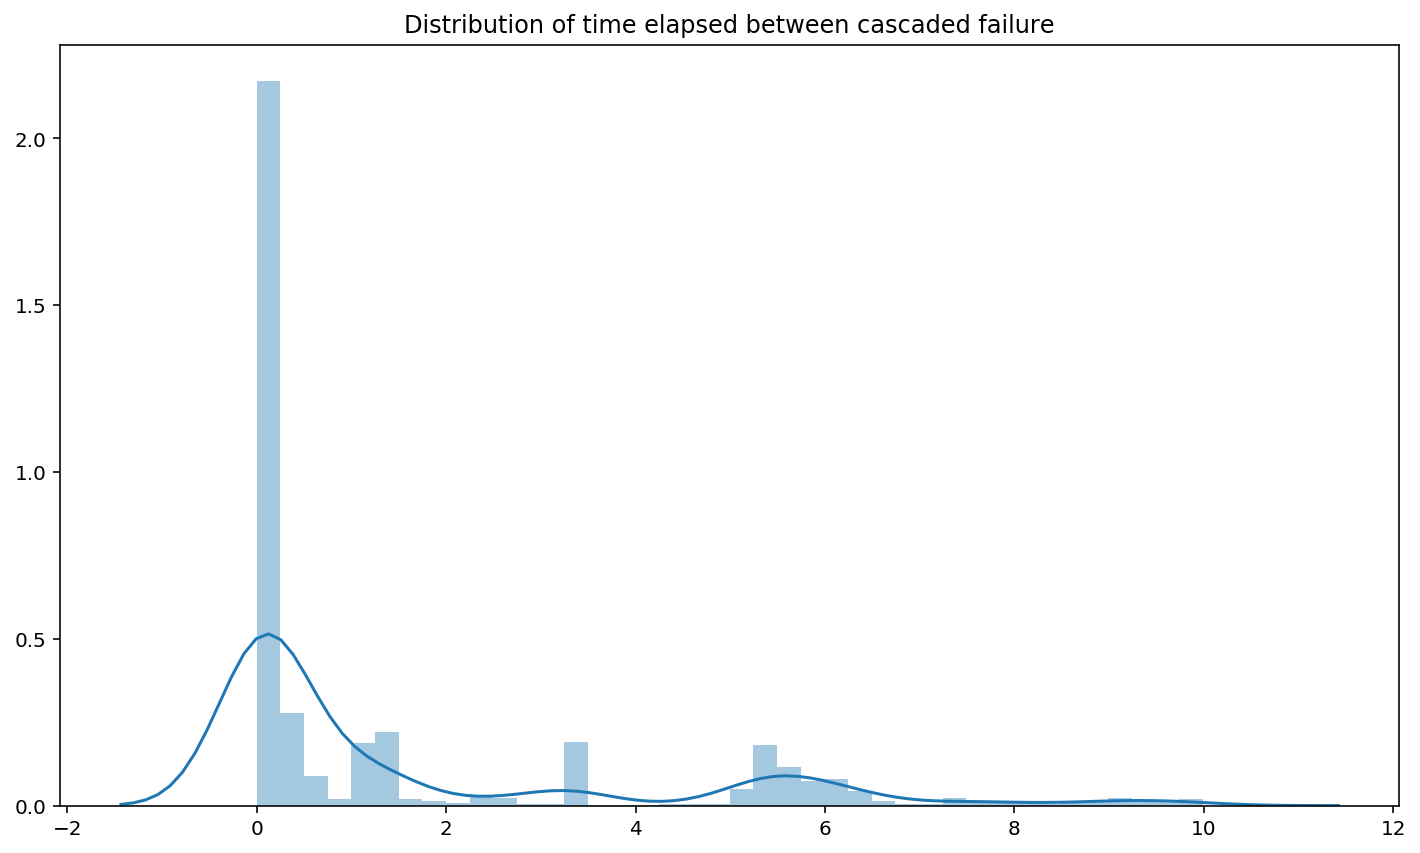

In [698]:
# Plot the distribution of time elapsed between first and second failure,
ax = sns.distplot([x for x in time_btw_1st_2nd if x < 10]).set_title('Distribution of time elapsed between cascaded failure')

In [538]:
no_fail_results = results[results['flag'].astype(float) == 0]

no_fail_results['n_failures'] = 0; no_fail_results['t_fail'] = np.nan; 
no_fail_results['t_first_fail'] = np.nan; no_fail_results['dt_fail'] = np.nan; 
no_fail_results['failed component_type'] = np.nan

no_fail_results.head(n = 3)

<ipython-input-538-d2adc936bc90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_fail_results['n_failures'] = 0; no_fail_results['t_fail'] = np.nan;
<ipython-input-538-d2adc936bc90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_fail_results['t_first_fail'] = np.nan; no_fail_results['dt_fail'] = np.nan;
<ipython-input-538-d2adc936bc90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,Simulation no#,Line,Load,Wind1,Wind2,Wind3,flag,Sequence,n_failures,t_fail,t_first_fail,dt_fail,failed component_type
0,1,Line 04 - 05,0.7,0,0,0,0,[],0,NaN,NaN,NaN,NaN
2,2,Line 06 - 07,0.7,0,0,0,0,[],0,NaN,NaN,NaN,NaN
4,3,Line 06 - 11,0.7,0,0,0,0,[],0,NaN,NaN,NaN,NaN


Creating a results df of only the simulations resulting in cascading failures

In [527]:
fail_results = results[results['flag'].astype(float) == 1]

fail_results.head(n = 3)

,Simulation no#,Line,Load,Wind1,Wind2,Wind3,flag,Sequence
12,7,Line 16 - 19,0.7,0,0,0,1,"[('G 05', 'Over-Speed', '1.70')]"
38,20,Line 01 - 02,0.7,0,0,0,1,"[('G 01', 'Under-Speed', '5.00')]"
60,31,Line 01 - 39,0.7,0,0,0,1,"[('G 02', 'UV', '2.73'), ('G 01', 'Under-Speed..."


Finding the number of failures in each cascade

In [528]:
fail_results['n_failures'] = n_fail_comp

<ipython-input-528-295e533862e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail_results['n_failures'] = n_fail_comp


Histogram of the number of failures in cascading sequences

Text(0.5, 1.0, "Frequency of each 'number of failed components' in failure cases")

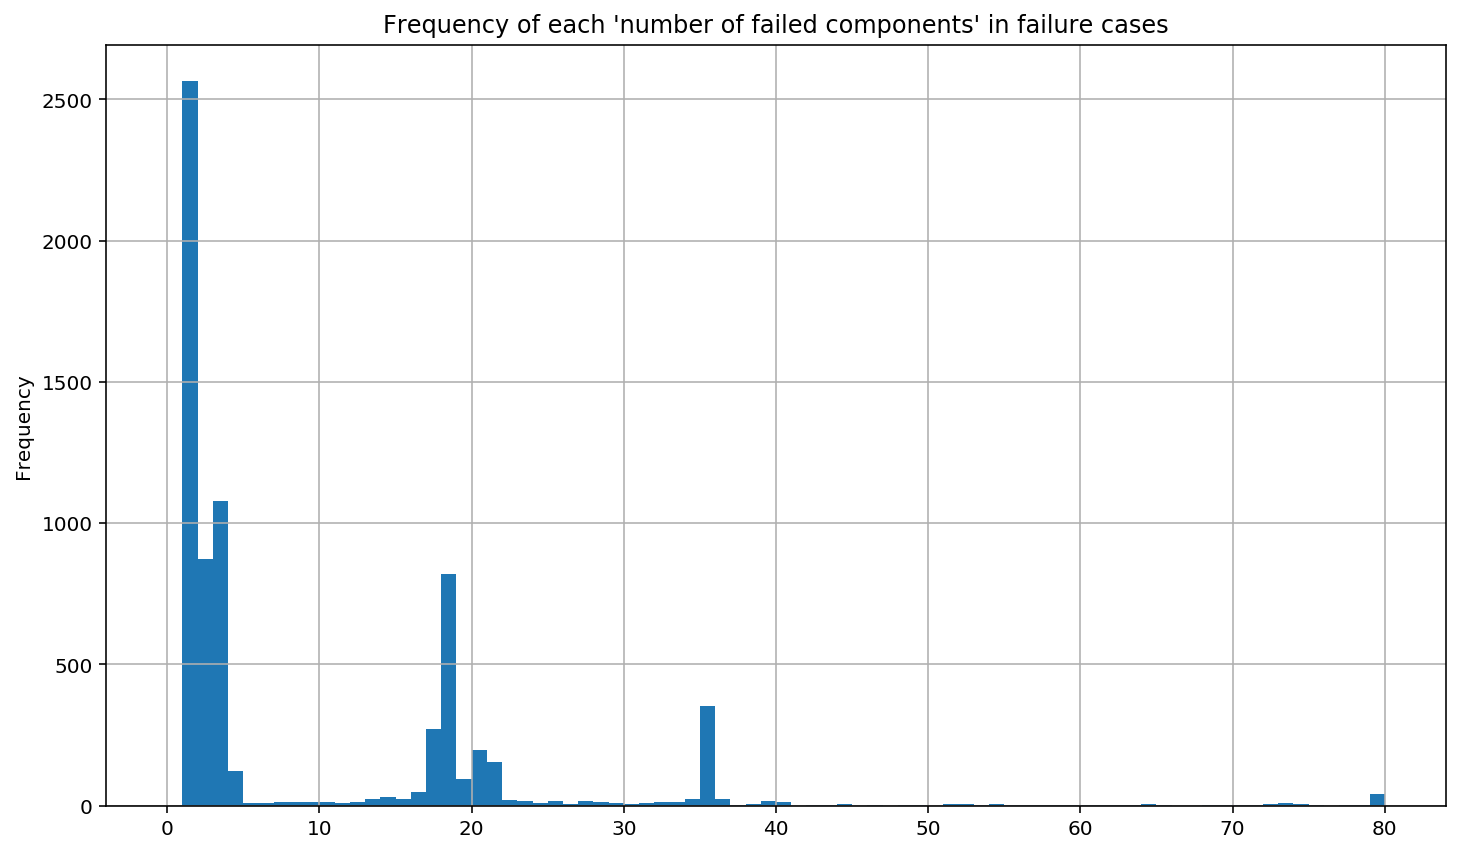

In [529]:
bin_list = list(range(0, fail_results['n_failures'].max()))
fail_results['n_failures'].plot.hist(grid = True, bins = bin_list)
plt.title("Frequency of each 'number of failed components' in failure cases")

Extracting the time of each failure event

In [530]:
t_fail = []
nrows = fail_results.shape[0]

for i in range(nrows):
    t_fail.append([x[-1] for x in cascades[i]])

In [532]:
fail_results['t_fail'] = t_fail

fail_results.head(n = 3)

<ipython-input-532-3a7481e892db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail_results['t_fail'] = t_fail


,Simulation no#,Line,Load,Wind1,Wind2,Wind3,flag,Sequence,n_failures,t_fail
12,7,Line 16 - 19,0.7,0,0,0,1,"[('G 05', 'Over-Speed', '1.70')]",1,[1.70]
38,20,Line 01 - 02,0.7,0,0,0,1,"[('G 01', 'Under-Speed', '5.00')]",1,[5.00]
60,31,Line 01 - 39,0.7,0,0,0,1,"[('G 02', 'UV', '2.73'), ('G 01', 'Under-Speed...",2,"[2.73, 5.79]"


In [533]:
t_first_fail = fail_results['t_fail'].apply(pd.Series)[0]
fail_results['t_first_fail'] = t_first_fail

fail_results.head(n = 3)

<ipython-input-533-93a094c7c4a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail_results['t_first_fail'] = t_first_fail


,Simulation no#,Line,Load,Wind1,Wind2,Wind3,flag,Sequence,n_failures,t_fail,t_first_fail
12,7,Line 16 - 19,0.7,0,0,0,1,"[('G 05', 'Over-Speed', '1.70')]",1,[1.70],1.70
38,20,Line 01 - 02,0.7,0,0,0,1,"[('G 01', 'Under-Speed', '5.00')]",1,[5.00],5.00
60,31,Line 01 - 39,0.7,0,0,0,1,"[('G 02', 'UV', '2.73'), ('G 01', 'Under-Speed...",2,"[2.73, 5.79]",2.73


Text(0.5, 1.0, 'Time of (all) failures')

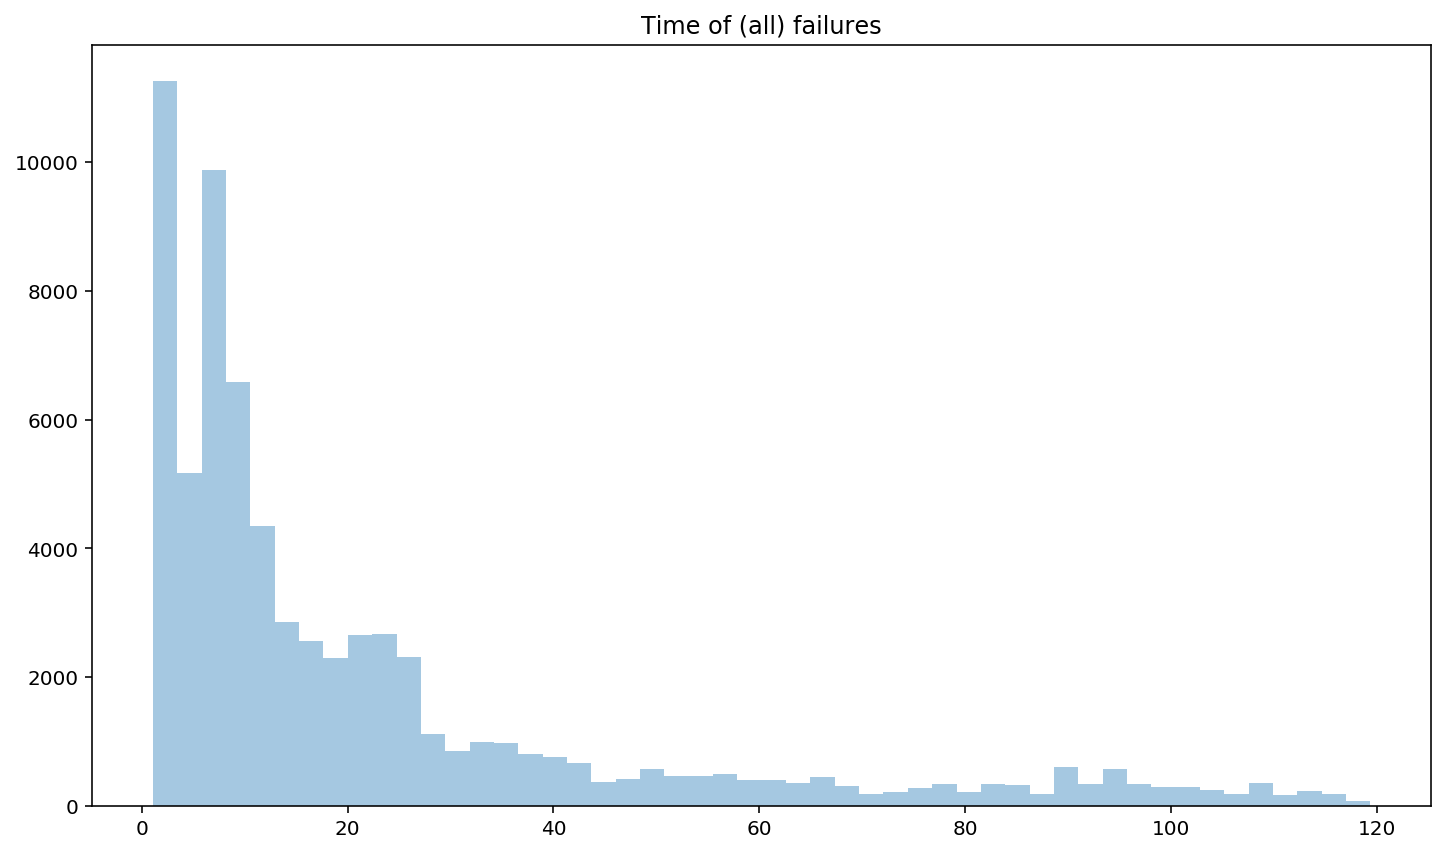

In [542]:
sns.distplot(fail_results['t_fail'].apply(pd.Series).stack(), kde = False).set_title('Time of (all) failures') # Check why this is different to above plot?

Text(0.5, 1.0, 'Time of first failure')

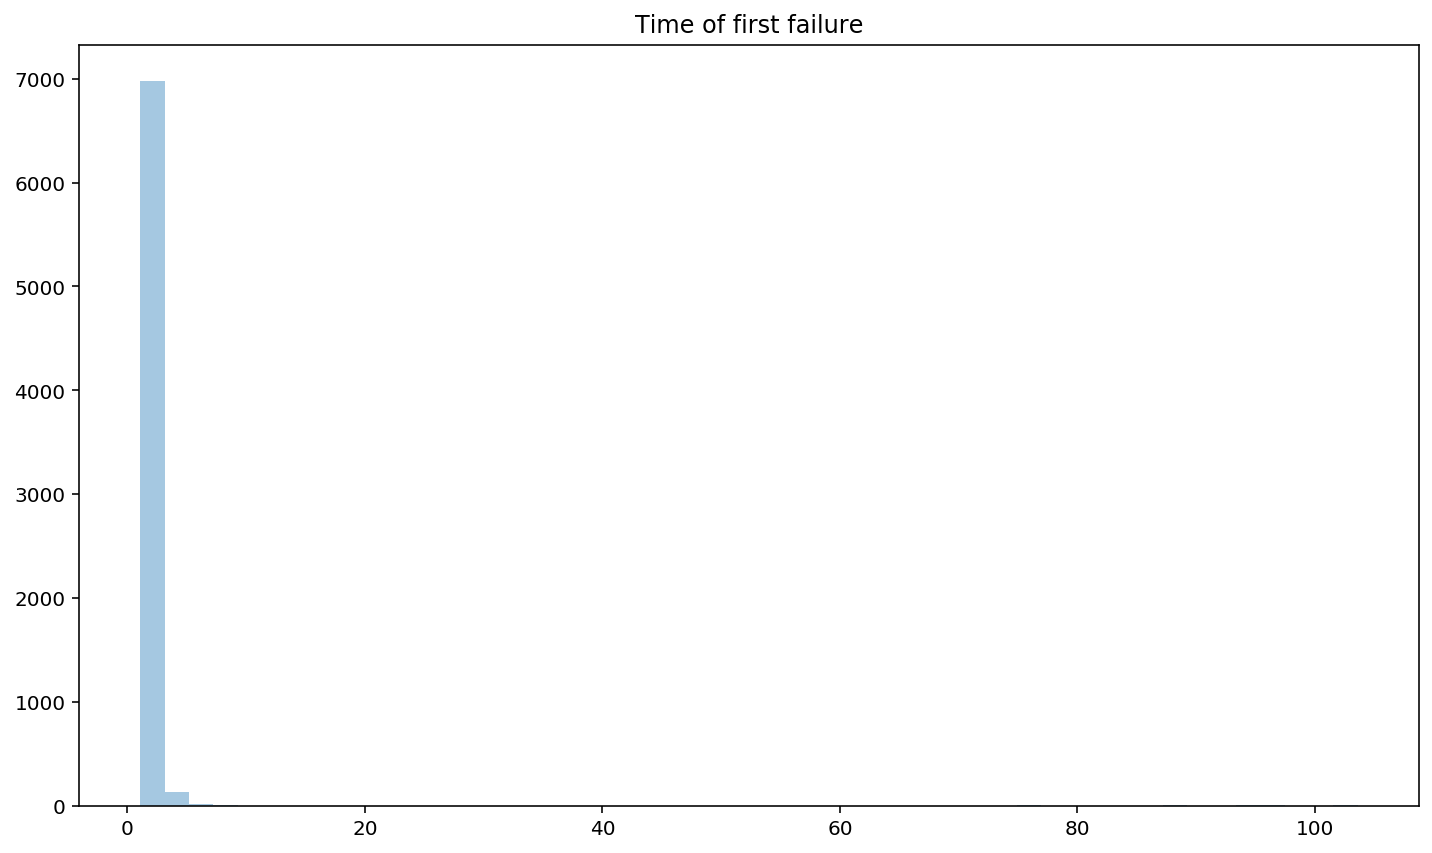

In [541]:
sns.distplot(fail_results['t_first_fail'].apply(pd.Series).stack(), kde = False).set_title('Time of first failure')

Extracting the times between successive failures

In [536]:
nrows = cascade_results.shape[0]

dt_fail = []

for r in range (nrows):
    dt_fail.append([float(t_fail[r][i+1]) - float(t_fail[r][i]) for i in range(len(t_fail[r])-1)])

In [537]:
fail_results['dt_fail'] = dt_fail

fail_results.head(n = 3)

<ipython-input-537-1e28da9e3a07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail_results['dt_fail'] = dt_fail


,Simulation no#,Line,Load,Wind1,Wind2,Wind3,flag,Sequence,n_failures,t_fail,t_first_fail,dt_fail
12,7,Line 16 - 19,0.7,0,0,0,1,"[('G 05', 'Over-Speed', '1.70')]",1,[1.70],1.70,[]
38,20,Line 01 - 02,0.7,0,0,0,1,"[('G 01', 'Under-Speed', '5.00')]",1,[5.00],5.00,[]
60,31,Line 01 - 39,0.7,0,0,0,1,"[('G 02', 'UV', '2.73'), ('G 01', 'Under-Speed...",2,"[2.73, 5.79]",2.73,[3.06]


Text(0.5, 1.0, 'Time between successive failues')

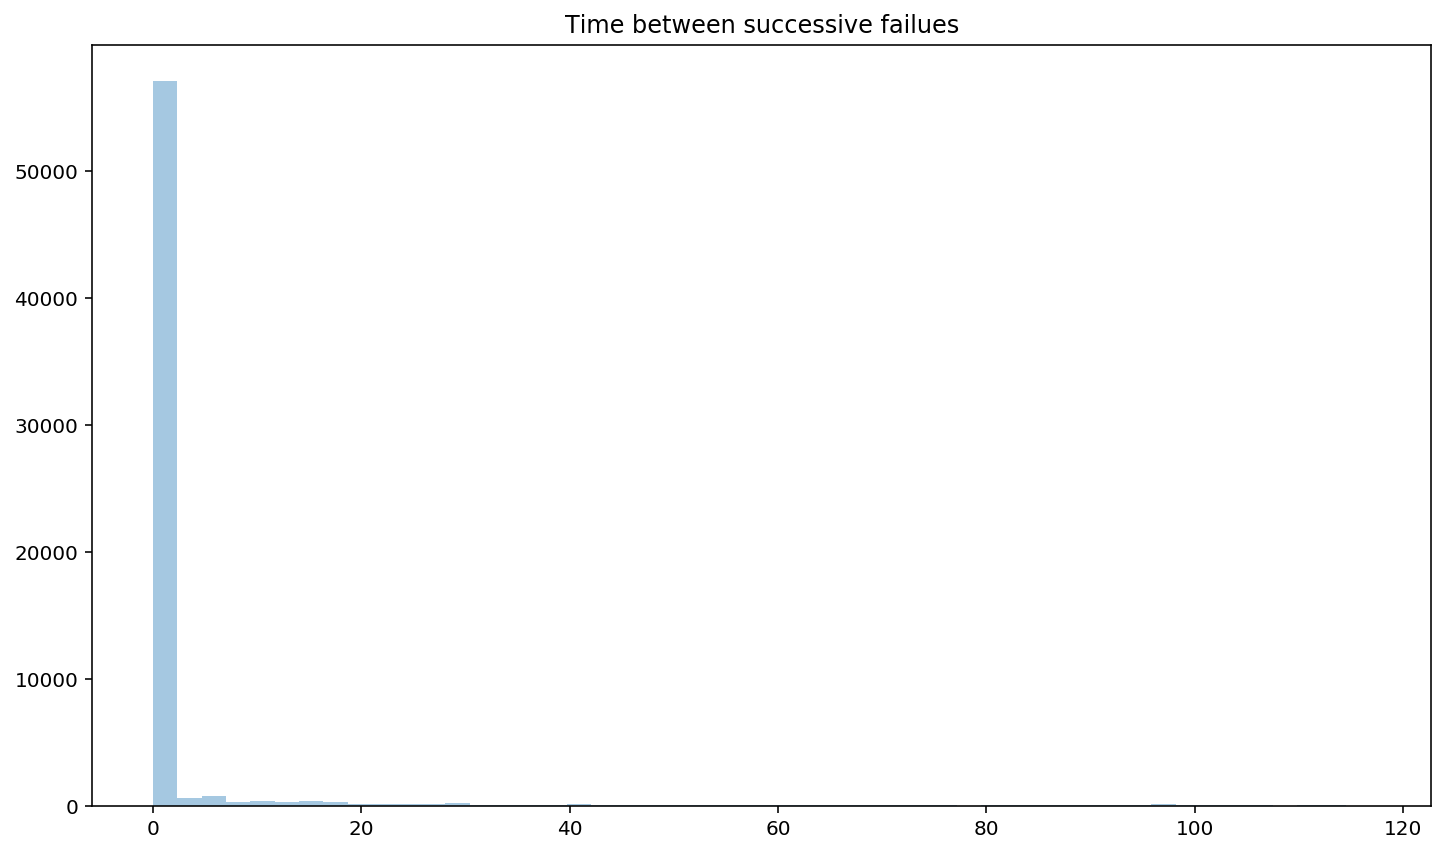

In [567]:
sns.distplot(fail_results['dt_fail'].apply(pd.Series).stack(), kde = False).set_title('Time between successive failues')

Looking at the different groups of components

In [563]:
components = []
nrows = fail_results.shape[0]

for i in range(nrows):
    components.append([x[0] for x in cascades[i]])

#components[0]
# Add dplyr::mutate(case_when(...)) for grouping component types

In [637]:
import re

load_search = re.compile('.*Load'); G_search = re.compile('.*G '); NSG_search = re.compile('.*NSG_')

component_type = []

for i in range(len(components)):
    new_list = []
    for j in range(len(components[i])):
        if re.search('.*Load', str(components[i][j])):
            new_list.append('Load')
        if re.search('.*G ', str(components[i][j])):
            new_list.append('Generator')
        if re.search('.*NSG_', str(components[i][j])):
            new_list.append('NSG')
    component_type.append(new_list)       

In [645]:
fail_results['failed_component_type'] = component_type

fail_results.tail(n = 10)

<ipython-input-645-640c51693bde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail_results['failed_component_type'] = component_type


,Simulation no#,Line,Load,Wind1,Wind2,Wind3,flag,Sequence,n_failures,t_fail,t_first_fail,dt_fail,failed_component_type
87920,43961,Line 05 - 08,1.2,1,1,0.4,1,"[('NSG_2', 'OverVoltage', '1.96'), ('Load 29A_...",16,"[1.96, 17.45, 17.45, 17.45, 17.45, 17.45, 17.4...",1.96,"[15.489999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[NSG, Load, Load, Load, Load, Load, Load, Load..."
87936,43969,Line 16 - 19,1.2,1,1,0.6,1,"[('G 05', 'Over-Speed', '2.42'), ('Load 29A_UF...",18,"[2.42, 16.08, 16.08, 16.08, 16.08, 16.08, 16.0...",2.42,"[13.659999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[Generator, Load, Load, Load, Load, Load, Load..."
87946,43974,Line 28 - 29,1.2,1,1,0.6,1,"[('G 09', 'Over-Speed', '2.25'), ('Load 25A_UF...",35,"[2.25, 8.42, 8.42, 8.42, 8.42, 8.43, 8.43, 8.4...",2.25,"[6.17, 0.0, 0.0, 0.0, 0.009999999999999787, 0....","[Generator, Load, Load, Load, Load, Load, Load..."
88004,44003,Line 16 - 19,1.2,1,1,0.8,1,"[('G 05', 'Over-Speed', '2.42'), ('Load 08A_UF...",18,"[2.42, 16.69, 16.69, 16.69, 16.69, 16.69, 16.6...",2.42,"[14.270000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[Generator, Load, Load, Load, Load, Load, Load..."
88014,44008,Line 28 - 29,1.2,1,1,0.8,1,"[('G 09', 'Over-Speed', '2.25'), ('Load 25A_UF...",35,"[2.25, 8.45, 8.46, 8.46, 8.46, 8.46, 8.46, 8.4...",2.25,"[6.199999999999999, 0.010000000000001563, 0.0,...","[Generator, Load, Load, Load, Load, Load, Load..."
88030,44016,Line 01 - 02,1.2,1,1,0.8,1,"[('NSG_3', 'UnderVoltage', '89.03'), ('G 01', ...",3,"[89.03, 96.65, 108.30]",89.03,"[7.6200000000000045, 11.649999999999991]","[NSG, Generator, NSG]"
88072,44037,Line 16 - 19,1.2,1,1,1,1,"[('G 04', 'Over-Speed', '2.45'), ('G 05', 'Ove...",18,"[2.45, 2.45, 16.10, 16.10, 16.11, 16.11, 16.11...",2.45,"[0.0, 13.650000000000002, 0.0, 0.0099999999999...","[Generator, Generator, Load, Load, Load, Load,..."
88082,44042,Line 28 - 29,1.2,1,1,1,1,"[('G 09', 'Over-Speed', '2.23'), ('Load 25A_UF...",35,"[2.23, 8.38, 8.38, 8.38, 8.38, 8.38, 8.38, 8.3...",2.23,"[6.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009999999999...","[Generator, Load, Load, Load, Load, Load, Load..."
88098,44050,Line 01 - 02,1.2,1,1,1,1,"[('NSG_2', 'OverVoltage', '2.59'), ('G 01', 'O...",21,"[2.59, 2.61, 14.17, 25.19, 33.05, 33.05, 33.05...",2.59,"[0.020000000000000018, 11.56, 11.0200000000000...","[NSG, Generator, NSG, NSG, Load, Load, Load, L..."
88120,44061,Line 01 - 39,1.2,1,1,1,1,"[('NSG_2', 'OverVoltage', '3.04'), ('G 01', 'O...",21,"[3.04, 3.10, 14.70, 25.71, 33.39, 33.39, 33.39...",3.04,"[0.06000000000000005, 11.6, 11.010000000000002...","[NSG, Generator, NSG, NSG, Load, Load, Load, L..."


### Create a results dataframe that a classification algorithm could use to predict:
 - fail / no fail
 - number of failed components
 - time of failure(s)
 - type of failed component(s)

In [646]:
tables_to_concat = [no_fail_results, fail_results]
processed_results = pd.concat(tables_to_concat).sort_values(by = ['Simulation no#'])

processed_results.head(n = 3)

,Simulation no#,Line,Load,Wind1,Wind2,Wind3,flag,Sequence,n_failures,t_fail,t_first_fail,dt_fail,failed component_type,failed_component_type
0,1,Line 04 - 05,0.7,0,0,0,0,[],0,NaN,NaN,NaN,NaN,NaN
18,10,Line 26 - 28,0.7,0,0,0,0,[],0,NaN,NaN,NaN,NaN,NaN
198,100,Line 09 - 39,0.7,0,0,0.4,0,[],0,NaN,NaN,NaN,NaN,NaN


In [693]:
processed_results['cascade'] = np.nan
processed_results.loc[processed_results['n_failures'] <= 1, 'cascade'] = False
processed_results.loc[processed_results['n_failures'] > 1, 'cascade'] = True

processed_results['fail'] = np.nan
processed_results.loc[processed_results['flag'].astype(float) == 0, 'fail'] = False
processed_results.loc[processed_results['flag'].astype(float) == 1, 'fail'] = True

processed_results[processed_results['flag'].astype(float) == 1].head(n = 3) # Checking new values

,Simulation no#,Line,Load,Wind1,Wind2,Wind3,flag,Sequence,n_failures,t_fail,t_first_fail,dt_fail,failed component_type,failed_component_type,cascade,fail
20004,10003,Line 16 - 19,0.8,0.4,0.2,0,1,"[('G 05', 'Over-Speed', '1.75')]",1,[1.75],1.75,[],NaN,[Generator],False,True
20006,10004,Line 16 - 21,0.8,0.4,0.2,0,1,"[('NSG_2', 'OverVoltage', '2.17')]",1,[2.17],2.17,[],NaN,[NSG],False,True
20014,10008,Line 28 - 29,0.8,0.4,0.2,0,1,"[('NSG_2', 'OverVoltage', '2.27'), ('NSG_1', '...",2,"[2.27, 2.48]",2.27,[0.20999999999999996],NaN,"[NSG, NSG]",True,True


In [700]:
pd.unique(processed_results['flag']) # Checking that all simulations with errors have been removed

array(['0', '1'], dtype=object)

In [701]:
# processed_results.to_csv('processed_results_summary.csv')

In [647]:
min_dt = 0; max_dt = 100

In [552]:
failed_together = []; delayed_failures = []

for r in range(nrows):
        for i in range(len(fail_results['dt_fail'].iloc[r])):
            if fail_results['dt_fail'].iloc[r][i] <= min_dt:
                failed_together.append(fail_results['failed_component_type'].iloc[r][i])
            elif fail_results['dt_fail'].iloc[r][i] >= max_dt:
                delayed_failures.append(fail_results['failed_component_type'].iloc[r][i])

In [553]:
loads_failed_together = list(filter(load_search.match, failed_together))
generators_failed_together = list(filter(G_search.match, failed_together))
nsgs_failed_together = list(filter(NSG_search.match, failed_together))

len(failed_together) - (len(loads_failed_together) + len(generators_failed_together) + len(nsgs_failed_together)) # check I'm not double counting

0

The vast proportion of cases where components are failing at exactly the same time, correspond to loads

(-0.5, 999.5, 499.5, -0.5)

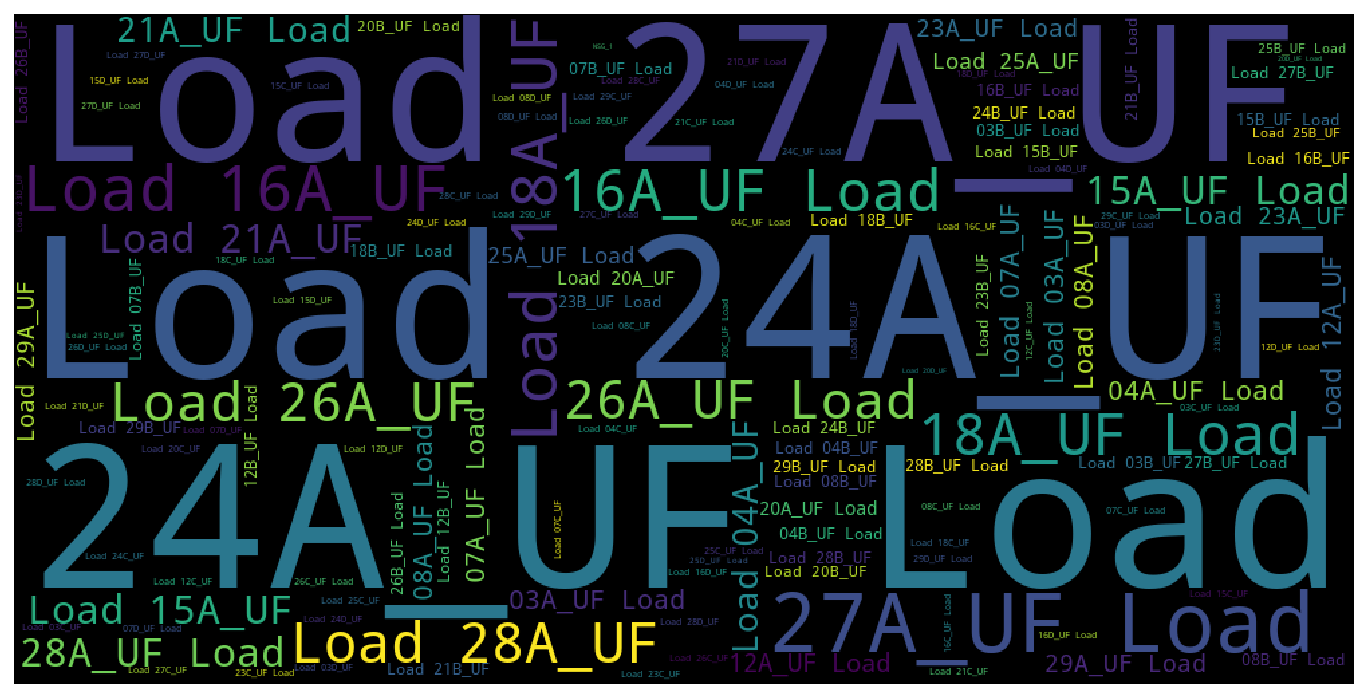

In [554]:
from wordcloud import WordCloud

failed_together_wc = WordCloud(width = 1000, height = 500).generate(" ".join(failed_together))
plt.imshow(failed_together_wc); plt.axis("off")

In [555]:
loads_delayed = list(filter(load_search.match, delayed_failures))
generators_delayed = list(filter(G_search.match, delayed_failures))
nsgs_delayed = list(filter(NSG_search.match, delayed_failures))

len(delayed_failures) - (len(loads_delayed) + len(generators_delayed) + len(nsgs_delayed)) # check I'm not double counting

0

The majority of cases where components are failing a long time after a previous failure, correspond to generators

(-0.5, 999.5, 499.5, -0.5)

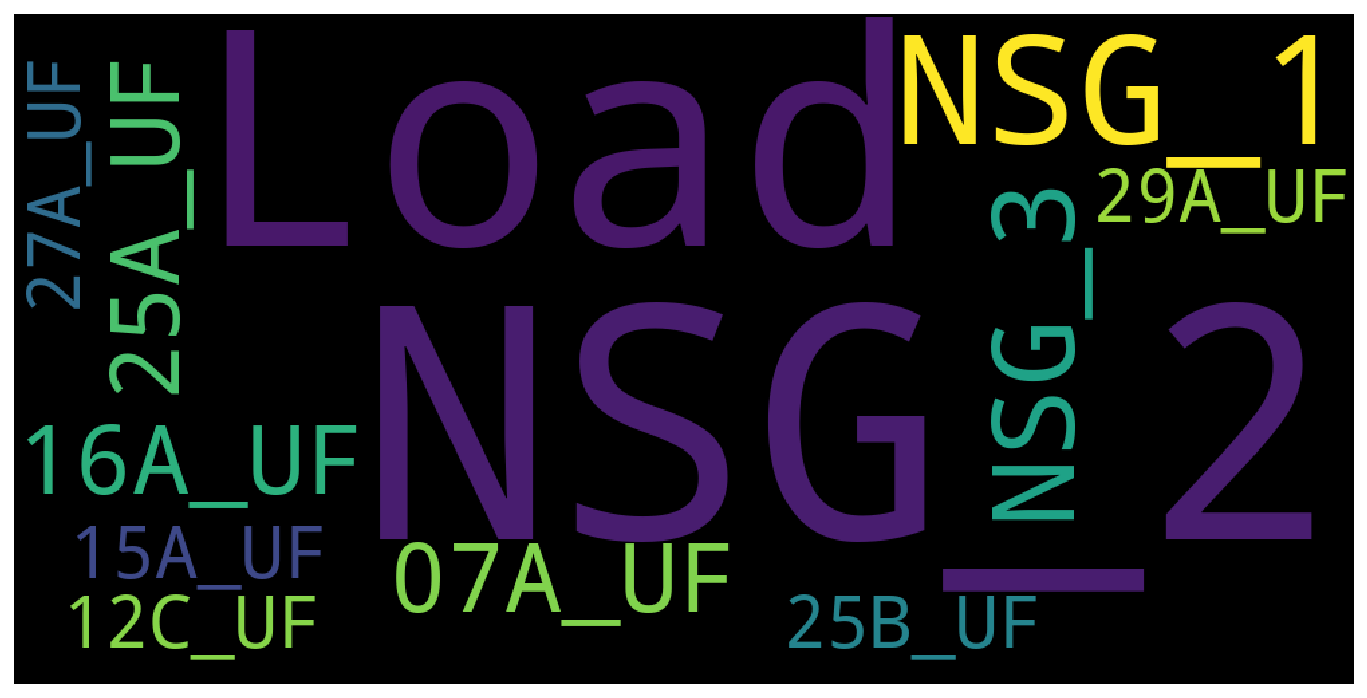

In [556]:
delayed_failures_wc = WordCloud(width = 1000, height = 500).generate(" ".join(delayed_failures))
plt.imshow(delayed_failures_wc); plt.axis("off")